### Imports

In [6]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# эти строки определяют глобальные свойства фигуры, используемые для публикации
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

### Theory

В линейной алгебре вектор – это упорядоченный список чисел. (В абстрактной линейной алгебре векторы могут содержать другие математические объекты, включая функции; однако поскольку данная книга ориентирована на
приложения, мы будем рассматривать только те векторы, которые содержат
числа.)

Векторы обладают несколькими важными характеристиками.

Первые две, с которых мы начнем, – это:
- размерность - число чисел в векторе;
- ориентация - ориентирован ли вектор вдоль столбца либо вдоль строки.


Ранее я писал, что размерность вектора – это число элементов в этом векторе.

Однако в Python размерность вектора или мат­ри­цы – это число геометрических измерений, используемых для распечатки числового объекта.


Например, все показанные выше векторы считаются в Python «двумерными массивами» независимо от содержащегося в векторах числа элементов (то есть математической размерности). Список чисел без определенной ориентации в Python считается одномерным массивом независимо от числа
элементов (этот массив будет распечатан в виде строки, но, как вы увидите позже, он обрабатывается иначе, чем вектор-строка).

Математическая размерность – число элементов в векторе – в Python называется длиной, или
очертанием, вектора.

### Создание и визуализация векторов в NumPy

In [ ]:
# 4 способа создание вектора в Numpy
asList = [1, 2, 3]
# одномерный массив
asArray = np.array([1, 2, 3])
# строка
rowVec = np.array([[1, 2, 3]])
# столбец
colVec = np.array([[1], [2], [3]])

In [ ]:
# отобразим размерности созданных векторов
print(f'asList: {np.shape(asList)}')
print(f'asArray: {asArray.shape}')
print(f'rowVec: {rowVec.shape}')
print(f'colVec: {colVec.shape}')

asList: (3,)
asArray: (3,)
rowVec: (1, 3)
colVec: (3, 1)


Результат показывает, что одномерный массив asArray имеет размер (3),
тогда как наделенные ориентацией векторы являются двумерными масси-
вами и хранятся как размер (1,3) либо (3,1) в зависимости от ориентации.
Размеры всегда указываются как (строки, столбцы).

Переменная asArray – это неориентированный массив, и, значит, это ни вектор-строка, ни вектор-столбец, а просто одномерный список чисел в NumPy.

В NumPy ориентация задается скобками: самые внешние скобки группируют все числа вместе в один объект. Затем каждый дополнительный набор скобок
указывает строку: вектор-строка (переменная rowVec) содержит все числа
в одной строке, в то время как вектор-столбец (переменная colVec) содержит
несколько строк, причем каждая строка содержит одно число.

### Геометрия векторов

Упорядоченный список чисел – это алгебраическая интерпретация вектора;

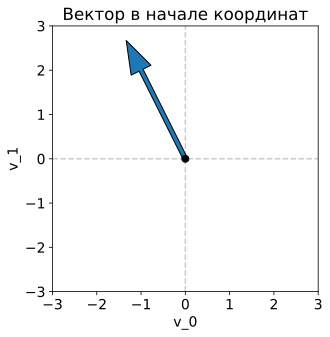

In [ ]:
# создадим вектор
v = np.array([-1,2])

# строим вектор (с точкой в хвосте)
plt.arrow(0, 0, v[0], v[1], head_width=0.5, width=0.1)
plt.plot(0, 0, 'ko', markerfacecolor='k', markersize=7)

# добавляем сетку осей
plt.plot([-3, 3], [0, 0], '--', color=[0.8, 0.8, 0.8], zorder=-1)
plt.plot([0, 0], [-3, 3], '--', color=[0.8, 0.8, 0.8], zorder=-1)

plt.axis('square')
plt.axis([-3,3,-3,3])
plt.xlabel('v_0')
plt.ylabel('v_1')
plt.title('Вектор в начале координат')
plt.show()

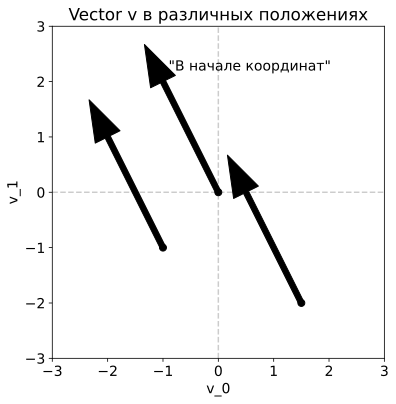

In [ ]:
# диапазон начальных позиций вектора
startPos = [
            [0,0],
            [-1, -1],
            [1.5, -2]
            ]

# создание новой фигуры
fig = plt.figure(figsize=(6,6))

for s in startPos:
    # построение нового вектора (с точками в начале)
    plt.arrow(s[0], s[1], v[0], v[1], head_width=0.5, width=0.1, color='black')
    plt.plot(s[0],s[1], 'ko', markerfacecolor='k', markersize=7)

    # Обозначение вектора, если он в начале координат
    if s == [0, 0]:
        plt.text(v[0]+0.1, v[1]+0.2, '"В начале координат"')

# добавление сетки осей
plt.plot([-3,3], [0,0], '--', color=[0.8, 0.8, 0.8], zorder=-1)
plt.plot([0,0], [-3,3], '--', color=[0.8, 0.8, 0.8], zorder=-1)

# косметика для отображения картинки
plt.axis('square')
plt.axis([-3,3,-3,3])
plt.xlabel('v_0')
plt.ylabel('v_1')
plt.title('Vector v в различных положениях')
plt.savefig('Figure_02_01.png',dpi=300) # write out the fig to a file
plt.show()

### Операции с векторами

Некоторые линейно-алгебраические операции элементарны и интуитивно понятны и работают именно так, как вы и ожидаете (например, сложение), в то время как другие более сложны и требуют объяснений в объеме целых глав (например, сингулярное разложение).

Давайте начнем с элементарных
операций.

#### Сложение двух векторов

Для того чтобы сложить два вектора, надо просто сложить каждый соответствующий элемент.

##### Пример сложения

In [7]:
# Using 2D vectors here instead of 3D vectors in the book to facilitate visualization
v = np.array([1,2])
w = np.array([4,-6])
vPlusW = v+w

# print out all three vectors
print(f'вектор v: {v}')
print(f'вектор w: {w}')
print(f'результирующий вектор суммы: {vPlusW}')

вектор v: [1 2]
вектор w: [ 4 -6]
результирующий вектор суммы: [ 5 -4]


##### Попытка сложения векторов разных размерностей

In [12]:
# зададим новые вектора
vec_1 = np.array([4, 5, 6])
vec_2 = np.array([10, 20, 30])
vec_3 = np.array([0, 3, 17, 25])

In [13]:
# вернет array([14, 25, 36])
vec_1 + vec_2

array([14, 25, 36])

In [17]:
vec_1.shape, vec_2.shape, vec_3.shape

((3,), (3,), (4,))

In [14]:
# вернет ошибку, т.к. измерения не совпадают
vec_2 + vec_3

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

##### Ориентиация вектора при сложении

Данный пример показывает, что ориентация действительно важна:
два вектора можно сложить, только если они имеют одинаковую размерность
и одинаковую ориентацию.

In [21]:
vec_1 = np.array([[15, 10 , -2]])
print(f'Вектор-строка:{vec_1}')
vec_2 = np.array([[15, 10 , -2]]).T
print(f'Вектор-столбец:{vec_2}')

Вектор-строка:[[15 10 -2]]
Вектор-столбец:[[15]
 [10]
 [-2]]


In [22]:
vec_1 + vec_2

array([[30, 25, 13],
       [25, 20,  8],
       [13,  8, -4]])

В данном примере каждое значение вектора-строки поочередно складывается с каждым значением вектора-столбца и записывается в результирующий вектор-столбец, образуя матрицу.

### Разность двух векторов

Вычитание векторов – это тоже то, что вы и ожидаете: вычесть второй вектор
из первого поэлементно.

In [8]:
V_minus_W = v-w

In [10]:
print(f'результирующий вектор разности: {V_minus_W}')

результирующий вектор разности: [-3  8]


### Геометрия сложения и вычитания векторов

Для того чтобы сложить два вектора геометрически, надо расположить векторы так, чтобы хвост одного вектора находился в голове другого вектора.
Суммируемый вектор проходит от хвоста первого вектора к голове второго
(график А на рис. 2.2).

Эту процедуру можно расширить, чтобы суммировать
любое число векторов: надо просто уложить все векторы от хвоста к голове,
и тогда сумма будет равна отрезку, идущему от первого хвоста к итоговой
голове.


Геометрическое вычитание векторов немного отличается, но является
одинаково элементарным: надо выровнять два вектора так, чтобы их хвос­
ты находились в одной и той же координате (это легко достигается, если оба
вектора находятся в стандартном положении); вектор разности – это отрезок
который идет от головы «отрицательного» вектора к голове «положительно-
го» вектора (график В на рис. 2.2).


Не стоит недооценивать важность геометрии вычитания векторов: она ле-
жит в основе ортогонального разложения векторов, которое, в свою очередь,
лежит в основе метода линейных наименьших квадратов, который является
одним из наиболее важных приложений линейной алгебры в науке и технике.

### Умножение вектора на скаляр

Скаляр в линейной алгебре – это число в чистом виде, не вложенное ни в век-
тор, ни в мат­ри­цу. Скаляры обычно обозначаются строчными греческими
буквами, такими как α или λ. Поэтому умножение вектора на скаляр обозначается, например, как βu.
Умножение вектора на скаляр выполняется очень просто: надо умножить
каждый элемент вектора на скаляр.

Вектор нулей

Вектор, состоящий из одних нулей, также именуемый вектором нулей, или нуль-вектором,
обозначается жирным шрифтом, **0**, и в линейной алгебре является специальным вектором.

Нередко использование вектора нулей для решения задачи фактически принято называть тривиальным решением и исключать. Линейная алгебра полна утверждений типа
«найти ненулевой вектор, который может решить ...» или «найти нетривиальное решение
для ...».

In [25]:
scalar_1 = -0.5
vec_1 = np.array([2,4,6])

scalar_2 = -3
vec_2 = np.array([-1,-3, -6])

mult_1 = vec_1 * scalar_1
mult_2 = vec_2 * scalar_2

print(mult_1, mult_2)

[-1. -2. -3.] [ 3  9 18]


#### Сложение вектора со скаляром

Сложение скаляра с вектором формально в линейной алгебре не определе-
но: это два отдельных вида математических объектов, которые невозможно
объединить. Однако программы числовой обработки, такие как Python, по-
зволяют складывать скаляры с векторами, и указанная операция сравнима
с умножением скаляра на вектор: скаляр прибавляется к каждому элементу
вектора. Следующий ниже исходный код иллюстрирует эту идею:

In [30]:
scalar_1 = -0.5
vec_1 = np.array([2,4,6])

scalar_1 + vec_1

array([1.5, 3.5, 5.5])

#### Геометрия умножения вектора на скаляр

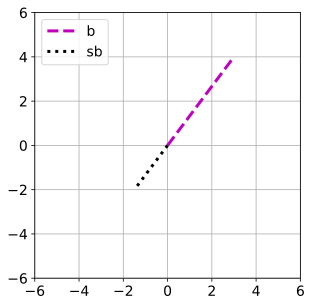

In [26]:
# plot
plt.plot([0,b[0]],[0,b[1]],'m--',linewidth=3,label='b')
plt.plot([0,s*b[0]],[0,s*b[1]],'k:',linewidth=3,label='sb')

plt.grid()
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend()
plt.show()

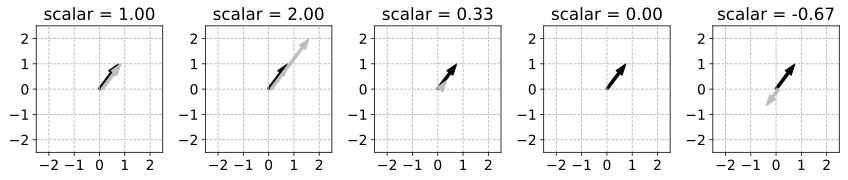

In [29]:
# Effects of different scalars

# a list of scalars:
scalars = [ 1, 2, 1/3, 0, -2/3 ]

baseVector = np.array([ .75,1 ])

# create a figure
fig,axs = plt.subplots(1,len(scalars),figsize=(12,3))
i = 0 # axis counter

for s in scalars:

  # compute the scaled vector
  v = s*baseVector

  # plot it
  axs[i].arrow(0,0,baseVector[0],baseVector[1],head_width=.3,width=.1,color='k',length_includes_head=True)
  axs[i].arrow(.1,0,v[0],v[1],head_width=.3,width=.1,color=[.75,.75,.75],length_includes_head=True)
  axs[i].grid(linestyle='--')
  axs[i].axis('square')
  axs[i].axis([-2.5,2.5,-2.5,2.5])
  axs[i].set(xticks=np.arange(-2,3), yticks=np.arange(-2,3))
  axs[i].set_title(f'scalar = {s:.2f}')
  i+=1 # update axis counter

plt.tight_layout()
plt.savefig('Figure_02_03.png',dpi=300)
plt.show()


### Транспонирование